<a href="https://colab.research.google.com/github/VishnuTeja-05/ML-Training/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Predicting Incident Impact on Customer Service**
##1) mention about problem statement
##2) Talk about columns
##3) Install the models and required libraries
##4) Load dataset
#5) understand about your data
#6) EDA(Exploratory data analysis )
#i) univariate analysis
#ii) Bi-variate analysis
#iii) multi-variate analysis
#7) check the null-values or missing values
#i) treating the null values(fill with mean or median or mode)
#ii) drop the null values if they as less than 5%
#8) check the duplicates
#i) drop the duplicates
#9) Treating the outliers
#i) check the outliers
#ii) remove outliers
#iii) make the boxplot before and after the outliers
#10) Feature Engineering
#a)i) Extract the features
#ii) Create the features
#iii) select the features
#b) check the multicoliniarity
#i) heatmap
#ii) vif technique
#c) transformation
#i) one hot encoding or label encoding
#11) X-y features split
#12) train test split
#**For Classification**
#1) apply smote technique
#2) build the models
#i) logistic regression
 #ii) decision Tree
 #iii) Random Forest
 #iv) gradient boost
 ##v) ada boost
 #vi) Knn
 #vii) svm
 #viii) naive bayes
# **For Regression**
#1 apply models
#i)linear regression
 #ii) decision Tree
 #iii) Random Forest
 #iv) gradient boost
 ##v) ada boost
 #vi) Knn
 #vii) svm
 #2 Hyper parameter tuning
 #i) cross validation
 #3 deploye the best model in streamlit or flask
 # For Clustering
 #1 apply the models
 #i)k-means
 #ii) DBSCAN
 #iii) Hierachical
 #2 evaluating Clusters(silhouette Score,Davies-Bouldin)

**Problem Statement:**

In a customer service environment, incidents reported by customers vary in severity, requiring different levels of attention and resolution. However, manual classification of incident impact is time-consuming and prone to inconsistencies, leading to inefficiencies in resource allocation, delayed response times, and decreased customer satisfaction.

This project aims to develop a predictive model that can automatically assess the impact of an incident based on historical data. By leveraging machine learning techniques, the model will classify incidents by severity, enabling businesses to prioritize critical issues, reduce response time, and enhance operational efficiency. The solution will be integrated into the incident management system to provide real-time impact predictions, improving service quality and customer experience.











*Talking about each column bold text bold text
    

ID – Unique identifier for each incident.

ID_status – The current status of the incident (e.g., Closed, Awaiting User Info).

active – Boolean indicating if the incident is still active.

count_reassign – Number of times the incident has been reassigned.

count_opening – Number of times the incident was opened.

count_updated – Total number of times the incident was updated.

ID_caller – Identifier for the customer who raised the incident.

opened_by – Identifier for the person who opened the incident.

opened_time – Timestamp of when the incident was opened.

Created_by – Identifier for who initially created the incident (sometimes missing).

updated_by – Identifier for the person who last updated the incident.

updated_time – Timestamp of the last update.

resolved_by – Identifier for who resolved the incident.

resolved_time – Timestamp of when the incident was resolved.

closed_by – Identifier for who closed the incident.

closed_time – Timestamp of when the incident was closed.

Category – General category under which the incident falls.

Category Id – Subcategory classification of the incident.

user_symptom – The reported issue or symptom by the user.

Support_group – The group assigned to resolve the issue.

support_incharge – The person responsible for handling the incident.

Doc_knowledge – Boolean indicating if documentation knowledge is available.

confirmation_check – Boolean indicating whether confirmation was performed.

impact – The severity of the incident (e.g., High, Medium).

notify – Whether notifications were sent out for the incident.

problem_ID – Associated problem ID if the incident is linked to a broader issue.

change_request – If the incident resulted in a change request.

In [6]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.dpi'] = 100

<ipython-input-6-440ed7fa99f1>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


**Loading the DataSet**

In [7]:
df = pd.read_csv("Incident_Event_Log.csv")  # Load dataset
df

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,Category Id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,INC0000001,Closed,False,1,0,18,Caller 917,Opened by 180,2016-02-29 08:22:00,Created by 81,...,Subcategory 9,Symptom 2,Group 58,Resolver 175,True,False,1 - High,Do Not Notify,?,CHG0000404
1,INC0000002,Closed,False,1,0,3,Caller 4907,Opened by 131,2016-02-29 09:15:00,Created by 20,...,Subcategory 185,Symptom 580,Group 58,Resolver 97,True,False,1 - High,Do Not Notify,Problem ID 2,CHG0000647
2,INC0000003,Awaiting Problem,True,2,0,5,Caller 4539,Opened by 433,2016-02-29 09:40:00,?,...,Subcategory 215,Symptom 226,Group 30,Resolver 159,True,False,1 - High,Do Not Notify,Problem ID 2,CHG0000404
3,INC0000004,Awaiting User Info,True,4,0,7,Caller 3304,Opened by 24,2016-02-29 08:23:00,Created by 171,...,Subcategory 106,Symptom 4,Group 12,Resolver 31,True,True,2 - Medium,Do Not Notify,Problem ID 2,?
4,INC0000005,Closed,True,3,0,18,Caller 5540,Opened by 180,2016-02-29 08:56:00,?,...,Subcategory 106,Symptom 529,Group 50,Resolver 193,True,False,2 - Medium,Do Not Notify,Problem ID 2,CHG0000404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100345,INC0100346,Resolved,True,1,0,1,Caller 1488,Opened by 131,2016-02-29 09:25:00,Created by 6,...,Subcategory 75,Symptom 529,Group 25,Resolver 186,True,False,2 - Medium,Do Not Notify,?,CHG0000404
100346,INC0100347,New,True,2,0,2,Caller 442,Opened by 180,2016-02-29 09:07:00,Created by 6,...,Subcategory 191,Symptom 592,Group 33,Resolver 170,True,True,3 - Low,Do Not Notify,Problem ID 2,?
100347,INC0100348,Awaiting User Info,True,2,0,8,Caller 314,Opened by 8,2016-02-29 07:10:00,?,...,Subcategory 194,Symptom 471,Group 65,Resolver 97,True,False,3 - Low,Do Not Notify,?,?
100348,INC0100349,Resolved,True,1,0,18,Caller 3957,Opened by 131,2016-02-29 09:18:00,Created by 171,...,Subcategory 291,Symptom 4,Group 29,Resolver 201,True,True,1 - High,Do Not Notify,Problem ID 2,?


**understand about the data**

In [ ]:
df.head()

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,Category Id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,INC0000001,Closed,False,1,0,18,Caller 917,Opened by 180,2016-02-29 08:22:00,Created by 81,...,Subcategory 9,Symptom 2,Group 58,Resolver 175,True,False,1 - High,Do Not Notify,?,CHG0000404
1,INC0000002,Closed,False,1,0,3,Caller 4907,Opened by 131,2016-02-29 09:15:00,Created by 20,...,Subcategory 185,Symptom 580,Group 58,Resolver 97,True,False,1 - High,Do Not Notify,Problem ID 2,CHG0000647
2,INC0000003,Awaiting Problem,True,2,0,5,Caller 4539,Opened by 433,2016-02-29 09:40:00,?,...,Subcategory 215,Symptom 226,Group 30,Resolver 159,True,False,1 - High,Do Not Notify,Problem ID 2,CHG0000404
3,INC0000004,Awaiting User Info,True,4,0,7,Caller 3304,Opened by 24,2016-02-29 08:23:00,Created by 171,...,Subcategory 106,Symptom 4,Group 12,Resolver 31,True,True,2 - Medium,Do Not Notify,Problem ID 2,?
4,INC0000005,Closed,True,3,0,18,Caller 5540,Opened by 180,2016-02-29 08:56:00,?,...,Subcategory 106,Symptom 529,Group 50,Resolver 193,True,False,2 - Medium,Do Not Notify,Problem ID 2,CHG0000404


In [ ]:
df.tail(8)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,Category Id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
47464,INC0047465,Active,False,5,0,18,Caller 5540,Opened by 24,2016-02-29 09:07:00,Created by 13,...,Subcategory 23,Symptom 253,Group 39,Resolver 97,True,False,3 - Low,Do Not Notify,Problem ID 2,?
47465,INC0047466,Awaiting User Info,True,2,0,4,Caller 154,Opened by 501,2016-02-29 08:03:00,Created by 13,...,Subcategory 23,Symptom 580,Group 27,Resolver 159,True,False,1 - High,Do Not Notify,Problem ID 2,CHG0000647
47466,INC0047467,Resolved,False,5,0,17,Caller 4416,Opened by 180,2016-02-29 08:32:00,Created by 20,...,Subcategory 54,Symptom 273,Group 66,Resolver 170,True,False,3 - Low,Do Not Notify,Problem ID 2,?
47467,INC0047468,New,False,0,0,11,Caller 307,Opened by 131,2016-02-29 09:22:00,Created by 20,...,Subcategory 47,Symptom 470,Group 65,Resolver 76,True,False,1 - High,Do Not Notify,Problem ID 2,CHG0000647
47468,INC0047469,Awaiting Problem,True,0,0,14,Caller 3038,Opened by 180,2016-02-29 01:16:00,Created by 62,...,Subcategory 94,Symptom 4,Group 68,Resolver 76,True,True,1 - High,Do Not Notify,Problem ID 2,CHG0000404
47469,INC0047470,Awaiting Problem,False,0,0,0,Caller 3754,Opened by 501,2016-02-29 09:14:00,Created by 171,...,Subcategory 168,Symptom 311,Group 23,Resolver 6,True,False,3 - Low,Do Not Notify,Problem ID 2,CHG0000404
47470,INC0047471,Awaiting Problem,False,4,0,8,Caller 4866,Opened by 24,2016-02-29 08:25:00,Created by 20,...,Subcategory 291,Symptom 450,Group 24,Resolver 180,True,True,2 - Medium,Do Not Notify,?,CHG0000647
47471,INC0047472,Active,False,0,0,13,Caller 3763,Opened by 180,2016-02-29 09:05:00,Created by 20,...,Subcategory 224,Symptom 253,Group 66,Resolver 198,True,NaN,NaN,NaN,NaN,NaN


Using the .describe() method in pandas provides summary statistics for numerical and categorical data

**For Numerical Columns (Default Behavior)**

count – Number of non-null values.

mean – Average value of the column.

std (Standard Deviation) – Measures the spread of data.

min – Minimum value.

25% (First Quartile, Q1) – 25% of values fall below this.

50% (Median, Q2) – Middle value of the dataset.

75% (Third Quartile, Q3) – 75% of values fall below this.

max – Maximum value.**bold text**

In [ ]:
df.describe()


,count_reassign,count_opening,count_updated
count,47472.000000,47472.0,47472.000000
mean,2.495534,0.0,9.004192
std,1.710192,0.0,5.491077
min,0.000000,0.0,0.000000
25%,1.000000,0.0,4.000000
50%,2.000000,0.0,9.000000
75%,4.000000,0.0,14.000000
max,5.000000,0.0,18.000000


**For Categorical Columns**

count – Number of non-null values.

unique – Number of unique categories.

top – Most frequent category.

freq – Frequency of the most common category.

In [ ]:
df.describe(include='object')

,ID,ID_status,ID_caller,opened_by,opened_time,Created_by,last_updated_by,updated_time,contact_mode,location,Category Id,user_symptom,Support_group,support_incharge,confirmation_check,impact,notify,problem_ID,change_request
count,47472,47472,47472,47472,47472,47472,47472,47472,47472,47472,47472,47472,47472,47472,47471,47471,47471,47471,47471
unique,47472,6,51,9,49,7,7,49,5,51,29,24,26,25,2,3,1,2,3
top,INC0000001,Active,Caller 3545,Opened by 433,2016-02-29 09:42:00,Created by 171,Created by 171,2016-02-29 06:10:00,IVR,Caller 5180,Subcategory 23,Symptom 2,Group 23,Resolver 78,False,3 - Low,Do Not Notify,Problem ID 2,?
freq,1,8008,1008,5348,1050,6950,6900,1042,9605,1029,1713,2038,1906,2007,23792,15854,47471,23808,15939


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47472 entries, 0 to 47471
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  47472 non-null  object
 1   ID_status           47472 non-null  object
 2   active              47472 non-null  bool  
 3   count_reassign      47472 non-null  int64 
 4   count_opening       47472 non-null  int64 
 5   count_updated       47472 non-null  int64 
 6   ID_caller           47472 non-null  object
 7   opened_by           47472 non-null  object
 8   opened_time         47472 non-null  object
 9   Created_by          47472 non-null  object
 10  last_updated_by     47472 non-null  object
 11  updated_time        47472 non-null  object
 12  contact_mode        47472 non-null  object
 13  location            47472 non-null  object
 14  Category Id         47472 non-null  object
 15  user_symptom        47472 non-null  object
 16  Support_group       47

In [ ]:
df.shape

(47472, 24)

**EDA(Exploratory data analysis )**

In [9]:
df.columns

Index(['ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'ID_caller', 'opened_by', 'opened_time', 'Created_by',
       'last_updated_by', 'updated_time', 'contact_mode', 'location',
       'Category Id', 'user_symptom', 'Support_group', 'support_incharge',
       'Doc_knowledge', 'confirmation_check', 'impact', 'notify', 'problem_ID',
       'change_request'],
      dtype='object')

In [10]:
#defining numeric and categorical column to treat null values based on that
categorical_columns = ['ID', 'ID_status', 'active', 'ID_caller', 'opened_by', 'opened_time', 'Created_by','last_updated_by', 'updated_time', 'contact_mode', 'location','Category Id', 'user_symptom', 'Support_group', 'support_incharge','Doc_knowledge', 'confirmation_check', 'impact', 'notify', 'problem_ID','change_request']
numerical_columns = ['count_reassign', 'count_opening','count_updated']
#Here age,CigsPerDay,totChol,sysBP,diaBP,heartrate and glucose are discrete numerical variables

In [ ]:
# For Total columns
df.nunique()

,0
ID,47472
ID_status,6
active,2
count_reassign,6
count_opening,1
count_updated,19
ID_caller,51
opened_by,9
opened_time,49
Created_by,7


In [ ]:
# for One column
df['active'].unique()

array([False,  True])

In [ ]:
df[['ID', 'count_reassign']]

,ID,count_reassign
0,INC0000001,1
1,INC0000002,1
2,INC0000003,2
3,INC0000004,4
4,INC0000005,3
...,...,...
47467,INC0047468,0
47468,INC0047469,0
47469,INC0047470,0
47470,INC0047471,4


In [ ]:
df.sample(5)

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,Category Id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
10479,INC0010480,Resolved,False,3,0,12,Caller 950,Opened by 62,2016-02-29 09:08:00,Created by 20,...,Subcategory 127,Symptom 450,Group 56,Resolver 198,True,True,3 - Low,Do Not Notify,Problem ID 2,CHG0000647
44195,INC0044196,Awaiting User Info,True,1,0,7,Caller 3842,Opened by 40,2016-02-29 07:38:00,?,...,Subcategory 127,Symptom 232,Group 65,Resolver 236,True,True,3 - Low,Do Not Notify,?,CHG0000647
43956,INC0043957,Active,False,4,0,16,Caller 3765,Opened by 501,2016-02-29 08:32:00,Created by 20,...,Subcategory 291,Symptom 607,Group 66,Resolver 198,True,False,1 - High,Do Not Notify,Problem ID 2,?
45626,INC0045627,Closed,True,3,0,14,Caller 307,Opened by 180,2016-02-29 08:22:00,?,...,Subcategory 224,Symptom 87,Group 47,Resolver 227,True,False,3 - Low,Do Not Notify,Problem ID 2,?
4249,INC0004250,Awaiting Problem,False,0,0,11,Caller 4491,Opened by 131,2016-02-29 09:06:00,Created by 6,...,Subcategory 168,Symptom 530,Group 66,Resolver 159,True,False,2 - Medium,Do Not Notify,Problem ID 2,CHG0000404


**check the null-values or missing values**

In [ ]:
df.isnull().sum()

,0
ID,0
ID_status,0
active,0
count_reassign,0
count_opening,0
count_updated,0
ID_caller,0
opened_by,0
opened_time,0
Created_by,0


In [ ]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)


ID                    0.000000
ID_status             0.000000
active                0.000000
count_reassign        0.000000
count_opening         0.000000
count_updated         0.000000
ID_caller             0.000000
opened_by             0.000000
opened_time           0.000000
Created_by            0.000000
last_updated_by       0.000000
updated_time          0.000000
contact_mode          0.000000
location              0.000000
Category Id           0.000000
user_symptom          0.000000
Support_group         0.000000
support_incharge      0.000000
Doc_knowledge         0.000000
confirmation_check    0.002107
impact                0.002107
notify                0.002107
problem_ID            0.002107
change_request        0.002107
dtype: float64


In [ ]:
data = df.dropna()
data

,ID,ID_status,active,count_reassign,count_opening,count_updated,ID_caller,opened_by,opened_time,Created_by,...,Category Id,user_symptom,Support_group,support_incharge,Doc_knowledge,confirmation_check,impact,notify,problem_ID,change_request
0,INC0000001,Closed,False,1,0,18,Caller 917,Opened by 180,2016-02-29 08:22:00,Created by 81,...,Subcategory 9,Symptom 2,Group 58,Resolver 175,True,False,1 - High,Do Not Notify,?,CHG0000404
1,INC0000002,Closed,False,1,0,3,Caller 4907,Opened by 131,2016-02-29 09:15:00,Created by 20,...,Subcategory 185,Symptom 580,Group 58,Resolver 97,True,False,1 - High,Do Not Notify,Problem ID 2,CHG0000647
2,INC0000003,Awaiting Problem,True,2,0,5,Caller 4539,Opened by 433,2016-02-29 09:40:00,?,...,Subcategory 215,Symptom 226,Group 30,Resolver 159,True,False,1 - High,Do Not Notify,Problem ID 2,CHG0000404
3,INC0000004,Awaiting User Info,True,4,0,7,Caller 3304,Opened by 24,2016-02-29 08:23:00,Created by 171,...,Subcategory 106,Symptom 4,Group 12,Resolver 31,True,True,2 - Medium,Do Not Notify,Problem ID 2,?
4,INC0000005,Closed,True,3,0,18,Caller 5540,Opened by 180,2016-02-29 08:56:00,?,...,Subcategory 106,Symptom 529,Group 50,Resolver 193,True,False,2 - Medium,Do Not Notify,Problem ID 2,CHG0000404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47466,INC0047467,Resolved,False,5,0,17,Caller 4416,Opened by 180,2016-02-29 08:32:00,Created by 20,...,Subcategory 54,Symptom 273,Group 66,Resolver 170,True,False,3 - Low,Do Not Notify,Problem ID 2,?
47467,INC0047468,New,False,0,0,11,Caller 307,Opened by 131,2016-02-29 09:22:00,Created by 20,...,Subcategory 47,Symptom 470,Group 65,Resolver 76,True,False,1 - High,Do Not Notify,Problem ID 2,CHG0000647
47468,INC0047469,Awaiting Problem,True,0,0,14,Caller 3038,Opened by 180,2016-02-29 01:16:00,Created by 62,...,Subcategory 94,Symptom 4,Group 68,Resolver 76,True,True,1 - High,Do Not Notify,Problem ID 2,CHG0000404
47469,INC0047470,Awaiting Problem,False,0,0,0,Caller 3754,Opened by 501,2016-02-29 09:14:00,Created by 171,...,Subcategory 168,Symptom 311,Group 23,Resolver 6,True,False,3 - Low,Do Not Notify,Problem ID 2,CHG0000404


In [ ]:
data.isnull().sum()

,0
ID,0
ID_status,0
active,0
count_reassign,0
count_opening,0
count_updated,0
ID_caller,0
opened_by,0
opened_time,0
Created_by,0


In [ ]:
null_percentage = (data.isnull().sum() / len(data)) * 100
print(null_percentage)

ID                    0.0
ID_status             0.0
active                0.0
count_reassign        0.0
count_opening         0.0
count_updated         0.0
ID_caller             0.0
opened_by             0.0
opened_time           0.0
Created_by            0.0
last_updated_by       0.0
updated_time          0.0
contact_mode          0.0
location              0.0
Category Id           0.0
user_symptom          0.0
Support_group         0.0
support_incharge      0.0
Doc_knowledge         0.0
confirmation_check    0.0
impact                0.0
notify                0.0
problem_ID            0.0
change_request        0.0
dtype: float64


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
47466,False
47467,False
47468,False
47469,False


In [ ]:
duplicate_counts = data.duplicated().sum()
duplicate_counts

0

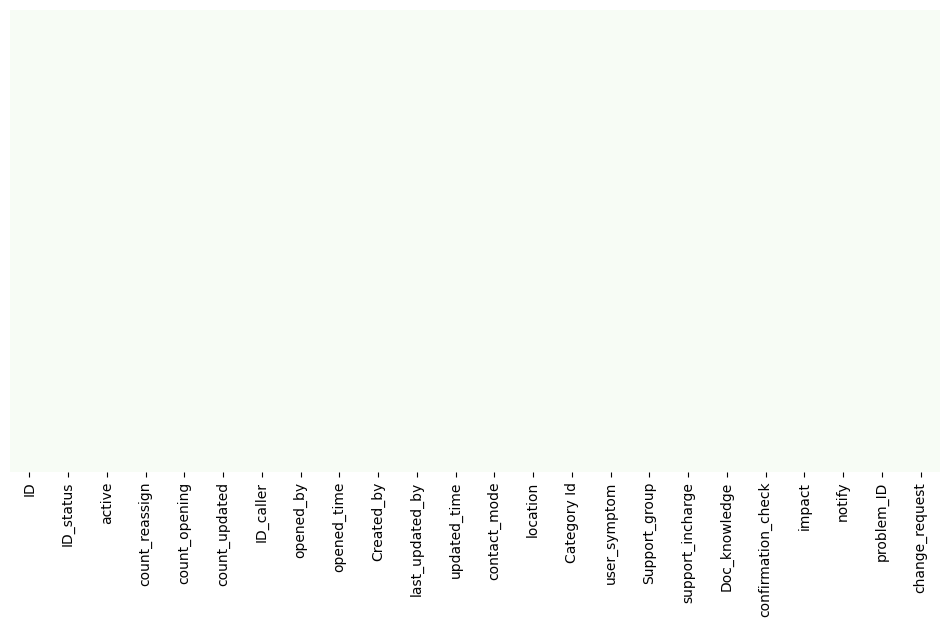

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='Greens');